In [68]:
import pandas as pd
import numpy as np
import glob

In [69]:
data = pd.read_csv(r"C:\INES\chp\chp_data_oneyear\chp_data_oneyear\Batch 1\data_127-0-0-1_2024-12-20 (0).csv", encoding = 'cp1252', sep = ';', skiprows=1)

In [70]:
csv_files = glob.glob(r"C:\INES\chp\chp_data_oneyear\chp_data_oneyear\Batch 1/*.csv")


data = pd.DataFrame()

for i,file in enumerate(csv_files):
    df = pd.read_csv(file, encoding = 'cp1252', sep = ';', skiprows=1)
    data = pd.concat([data,df])
    # if i >9 :
    #     break


In [71]:
data.shape
data.dropna(inplace=True)

In [72]:
data.head(1)

Description  Temperatur Vorlauf BHKW 2 (Heizzentrale)  \
1  2024/12/15 00:01:00                                     86.65   

   Temperatur Vorlauf BHKW 1 (Heizzentrale)  \
1                                      81.1   

   Volumenstrom BHKW 2 (Heizzentrale)  Betriebszustand BHKW 2 (Heizzentrale)  \
1                                2.52                                    0.0   

   Heizleistung BHKW 2 (Heizzentrale)  \
1                              103.36   

   Stromzähler BHKW 2 (Heizzentrale) Leistung  \
1                                        50.6   

   Betriebszustand BHKW 1 (Heizzentrale)  \
1                                    1.0   

   Temperatur Rücklauf BHKW 1 (Heizzentrale)  \
1                                      52.85   

   Heizleistung BHKW 1 (Heizzentrale)  \
1                               107.3   

   Temperatur Rücklauf BHKW 2 (Heizzentrale)  \
1                                       53.2   

   Stromzähler BHKW 1 (Heizzentrale) Leistung  \
1                                        50.6   

   Volumenstrom BHKW 1 (Heizzentrale)  
1                                3.04

In [73]:
chp1 = data.loc[:, data.columns.str.contains('BHKW 2')]

In [74]:
chp1.head()

Temperatur Vorlauf BHKW 2 (Heizzentrale)  \
1                                     86.65   
2                                     86.50   
3                                     86.55   
4                                     86.55   
5                                     86.60   

   Volumenstrom BHKW 2 (Heizzentrale)  Betriebszustand BHKW 2 (Heizzentrale)  \
1                                2.52                                    0.0   
2                                2.52                                    0.0   
3                                2.52                                    0.0   
4                                2.54                                    0.0   
5                                2.53                                    0.0   

   Heizleistung BHKW 2 (Heizzentrale)  \
1                              103.36   
2                              103.26   
3                              103.35   
4                              103.80   
5                              102.75   

   Stromzähler BHKW 2 (Heizzentrale) Leistung  \
1                                       50.60   
2                                       50.48   
3                                       50.60   
4                                       50.60   
5                                       50.60   

   Temperatur Rücklauf BHKW 2 (Heizzentrale)  
1                                      53.20  
2                                      53.20  
3                                      53.25  
4                                      53.30  
5                                      53.30

In [75]:
chp1['Time'] = data['Description']

chp1['Time']= pd.to_datetime(chp1['Time'], format='%Y-%m-%d %H:%M:%S')
chp1.set_index('Time', inplace= True)

C:\Users\Aqib\AppData\Local\Temp\ipykernel_16452\1364931096.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Aqib\AppData\Local\Temp\ipykernel_16452\1364931096.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
chp1.columns

Index(['Temperatur Vorlauf BHKW 2 (Heizzentrale)',
       'Volumenstrom BHKW 2 (Heizzentrale)',
       'Betriebszustand BHKW 2 (Heizzentrale)',
       'Heizleistung BHKW 2 (Heizzentrale)',
       'Stromzähler BHKW 2 (Heizzentrale) Leistung',
       'Temperatur Rücklauf BHKW 2 (Heizzentrale)'],
      dtype='object')

In [77]:
clmns = {'Temperatur Vorlauf BHKW 2 (Heizzentrale)' : 'Temperatur Vorlauf',
       'Betriebszustand BHKW 2 (Heizzentrale)' : 'Betriebszustand',
       'Temperatur Rücklauf BHKW 2 (Heizzentrale)': 'Temperatur Rücklauf',
        'Heizleistung BHKW 2 (Heizzentrale)': 'Heizleistung',
        'Stromzähler BHKW 2 (Heizzentrale) Leistung': 'Stromzähler Leistung',
        'Volumenstrom BHKW 2 (Heizzentrale)': 'Volumenstrom'}

In [78]:
chp1.rename(columns = clmns, inplace = True)

C:\Users\Aqib\AppData\Local\Temp\ipykernel_16452\209734648.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
chp1['switch'] = chp1['Betriebszustand'] != chp1['Betriebszustand'].shift(1)  #Shift moves data forward, so comparing current with the preceeding value.

C:\Users\Aqib\AppData\Local\Temp\ipykernel_16452\2984553958.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
val = 0
Tplus_list = []
for i, rows in enumerate(chp1.itertuples()):
    if rows.switch:  # check if switch is true
        val = 0
    
    Tplus_list.append(val)
    val += 1


chp1['T_plus'] = Tplus_list

C:\Users\Aqib\AppData\Local\Temp\ipykernel_16452\2481458260.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
# startup = chp1[(chp1['Heizleistung'] < 100) & (chp1['Betriebszustand'] == 0)]  #0 is on here. Wierd!!

In [82]:
startup = chp1[ (chp1['Betriebszustand'] == 0)]

In [83]:
firstswitch = startup[startup['switch']].index[0]  #the switch column has bool datatype

In [84]:
startup = startup.loc[firstswitch:,:]  # just to start from the first off to start up switch

In [85]:
# #To add a column T_lus
# #incrementing values, sets to 0, when there is a switch. And startup only has startup data, so a True in switch marks T0 of startup.

# val = 0
# Tplus_list = []
# for i, rows in enumerate(startup.itertuples()):
#     if rows.switch:  # check if switch is true
#         val = 0
    
#     Tplus_list.append(val)
#     val += 1


# startup['T_plus'] = Tplus_list

In [86]:
import matplotlib.pyplot as plt

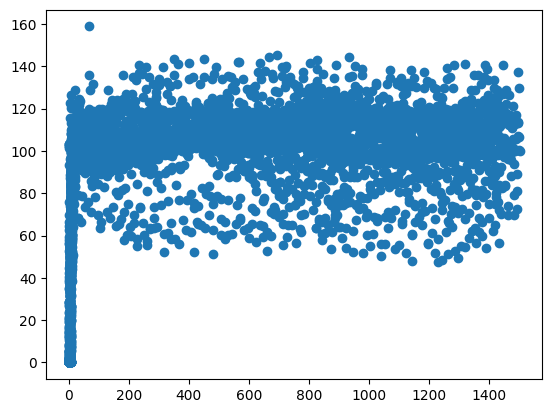

In [87]:
plt.plot(startup['T_plus'], startup['Heizleistung'], 'o')

# split into time steps(not worth)

In [88]:
startup['time_step'] = (startup['T_plus'] // 15) * 15

In [89]:
startup_15min = startup.groupby(by = 'time_step').mean()


Text(0, 0.5, 'Power output in Kw')

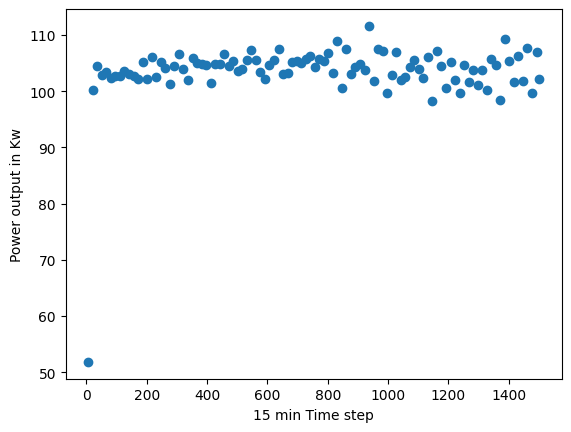

In [90]:
plt.plot(startup_15min['T_plus'], startup_15min['Heizleistung'], 'o')
plt.xlabel('15 min Time step')
plt.ylabel('Power output in Kw')

In [91]:
# pip install scikit-learn
startup_15min = startup.resample('15T').mean()
startup_15min.head()

Temperatur Vorlauf  Volumenstrom  Betriebszustand  \
Time                                                                     
2024-11-04 02:15:00           64.596429      0.712143              0.0   
2024-11-04 02:30:00           89.186667      2.447333              0.0   
2024-11-04 02:45:00           87.080000      2.748667              0.0   
2024-11-04 03:00:00           86.693333      2.769333              0.0   
2024-11-04 03:15:00           86.565385      2.814615              0.0   

                     Heizleistung  Stromzähler Leistung  Temperatur Rücklauf  \
Time                                                                           
2024-11-04 02:15:00     19.864286             43.232143            54.850000   
2024-11-04 02:30:00     94.737333             50.559333            56.753333   
2024-11-04 02:45:00    100.304667             50.553333            56.663333   
2024-11-04 03:00:00     99.513333             50.580667            56.613333   
2024-11-04 03:15:00    101.256923             50.243077            56.542308   

                       switch  T_plus  time_step  
Time                                              
2024-11-04 02:15:00  0.071429     6.5   0.000000  
2024-11-04 02:30:00  0.000000    21.0  14.000000  
2024-11-04 02:45:00  0.000000    36.0  29.000000  
2024-11-04 03:00:00  0.000000    51.0  44.000000  
2024-11-04 03:15:00  0.000000    65.0  58.846154

# Model fit

In [92]:
filtered = startup[startup['T_plus']<11]

In [93]:
x = np.arange(0,30,1/60)

### line fit

In [94]:
# coefficients = np.polyfit(startup.loc[startup['T_plus']<11, 'T_plus'], startup.loc[startup['T_plus']<11, 'Heizleistung'], 1)
# slope, intercept = coefficients

In [95]:
coefficients = np.polyfit(filtered['T_plus'], filtered['Heizleistung'], 1)
slope, intercept = coefficients

In [96]:
y = intercept + slope*x


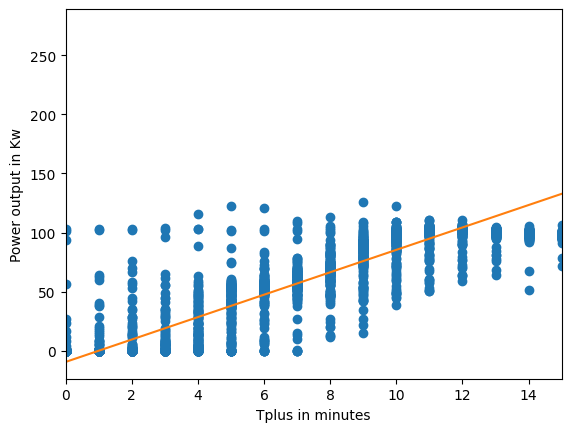

In [97]:
plt.plot(startup['T_plus'], startup['Heizleistung'], 'o')
plt.xlabel('Tplus in minutes')
plt.ylabel('Power output in Kw')
plt.plot(x,y)
plt.xlim(0,15)
plt.show()

In [98]:
intercept, slope

(-9.568873826980436, 9.488382384853972)

### Finding average

In [99]:
startup.loc[startup['T_plus']<16, 'Heizleistung'].mean()

54.57387205387206

### regression T_plus

In [100]:
# pip install statsmodels

In [101]:
import statsmodels.formula.api as smf 

In [102]:
results = smf.ols('Heizleistung ~ T_plus', data = filtered).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heizleistung   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     4867.
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:00:33   Log-Likelihood:                -8152.9
No. Observations:                1874   AIC:                         1.631e+04
Df Residuals:                    1872   BIC:                         1.632e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.5689      0.784    -12.210      0.000     -11.106      -8.032
T_plus         9.4884      0.136     69.763      0.000       9.222       9.755
==============================================================================
Omnibus:                      348.673   Durbin-Watson:                   0.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1968.830
Skew:                           0.751   Prob(JB):                         0.00
Kurtosis:                       7.792   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
filtered['T_plus2'] = filtered['T_plus']**2

C:\Users\Aqib\AppData\Local\Temp\ipykernel_16452\2180482959.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
results2 = smf.ols('Heizleistung ~ T_plus + T_plus2', data = filtered).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heizleistung   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     2693.
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:00:33   Log-Likelihood:                -8082.9
No. Observations:                1874   AIC:                         1.617e+04
Df Residuals:                    1871   BIC:                         1.619e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5279      1.008     -1.516      0.130      -3.505       0.449
T_plus         3.8804      0.484      8.021      0.000       2.932       4.829
T_plus2        0.5686      0.047     12.042      0.000       0.476       0.661
==============================================================================
Omnibus:                      474.629   Durbin-Watson:                   0.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2924.406
Skew:                           1.041   Prob(JB):                         0.00
Kurtosis:                       8.755   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
intercept, tplus, tplus2 = results2.params
intercept, tplus, tplus2

(-1.527939073360671, 3.8804425235282496, 0.5685880788289185)

In [106]:
y2 = intercept + tplus*x + tplus2*(x**2)

In [107]:
y2

array([ -1.52793907,  -1.46310709,  -1.39795922, ..., 624.71624269,
       625.3487151 , 625.9815034 ])

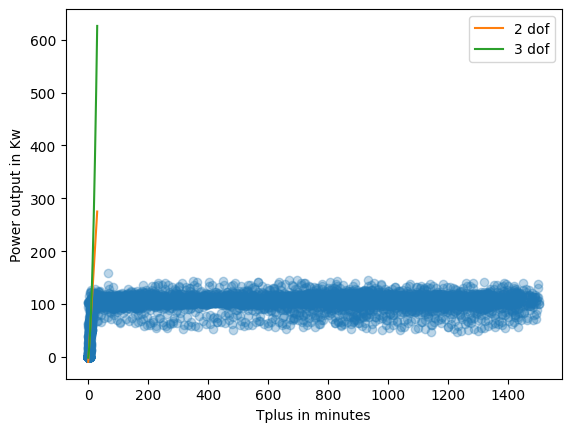

In [108]:
plt.plot(startup['T_plus'], startup['Heizleistung'], 'o', alpha = 0.3)
plt.xlabel('Tplus in minutes')
plt.ylabel('Power output in Kw')
plt.plot(x,y, label = '2 dof')
plt.plot(x,y2, label = '3 dof')
# plt.ylim(0,101)
plt.legend()
plt.show()

In [109]:
results.rsquared, results2.rsquared

(0.7222076322957158, 0.7421898546721793)

### To account for biger timesteps

In [110]:
# (1/60) to get Kwh, because data is with 1 min steps. To find Kw o/p for 11 minutes, divide by (11/60)
startup.iloc[:11,:].sum()*(1/60)/(11/60)

Temperatur Vorlauf       86.572727
Volumenstrom              2.523636
Betriebszustand           0.000000
Heizleistung            103.095455
Stromzähler Leistung     50.544545
Temperatur Rücklauf      53.327273
switch                    0.090909
T_plus                    5.000000
time_step                 0.000000
dtype: float64

In [111]:
startup.iloc[:11,:].sum()*(1/60) * 1000 # in wh

Temperatur Vorlauf      15871.666667
Volumenstrom              462.666667
Betriebszustand             0.000000
Heizleistung            18900.833333
Stromzähler Leistung     9266.500000
Temperatur Rücklauf      9776.666667
switch                     16.666667
T_plus                    916.666667
time_step                   0.000000
dtype: float64

In [112]:
#simulating logic for model
stepsize = 15 #minutes
(startup.iloc[:11,:].sum()*(1/60) + (92*(stepsize-11)/60) )/(stepsize/60)

Temperatur Vorlauf       88.020000
Volumenstrom             26.384000
Betriebszustand          24.533333
Heizleistung            100.136667
Stromzähler Leistung     61.599333
Temperatur Rücklauf      63.640000
switch                   24.600000
T_plus                   28.200000
time_step                24.533333
dtype: float64

In [113]:
step_size = 15*60
(5999.667  + 92000*((step_size/60) - 11)/60)/(step_size/3600)

48532.00133333333

In [114]:
92000*((step_size/60) - 11)/3600

102.22222222222223

In [115]:
38000/(step_size/3600)

152000.0

In [116]:
startup.iloc[:11,:].mean()*(11/60)

Temperatur Vorlauf      15.871667
Volumenstrom             0.462667
Betriebszustand          0.000000
Heizleistung            18.900833
Stromzähler Leistung     9.266500
Temperatur Rücklauf      9.776667
switch                   0.016667
T_plus                   0.916667
time_step                0.000000
dtype: float64

### Outliers??

In [117]:
oui = startup.loc[(startup['T_plus']>11) & (startup['Heizleistung']<75)]

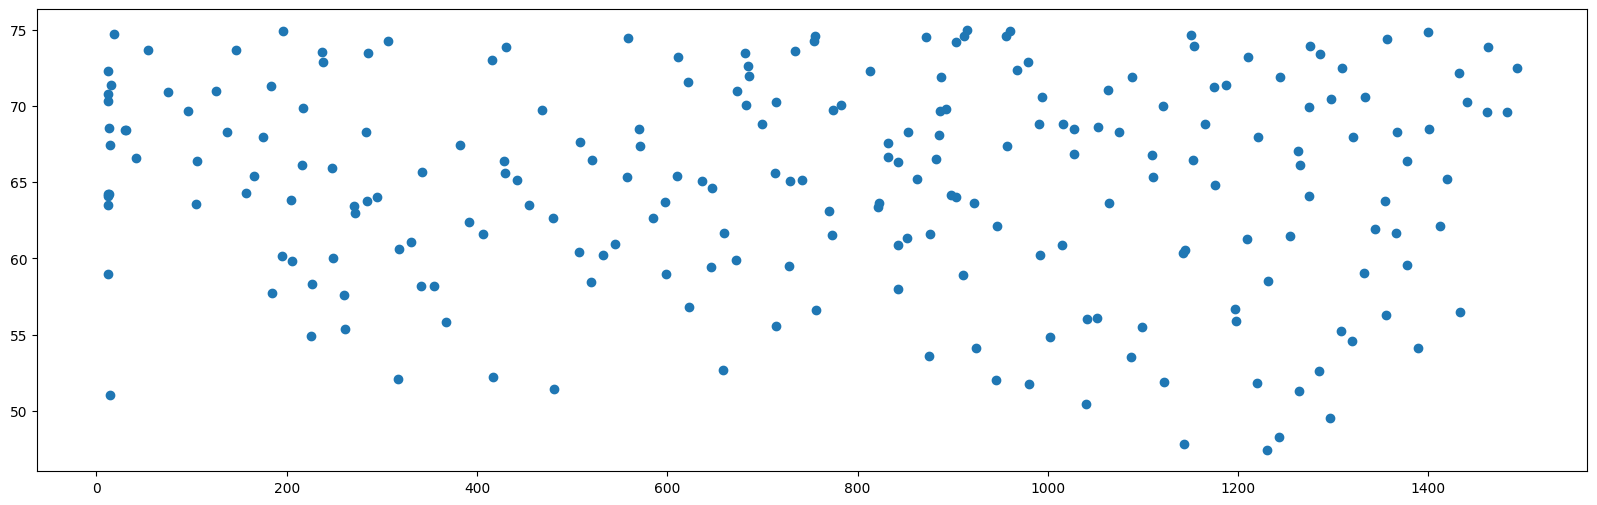

In [118]:
plt.figure(figsize=[20,6])
plt.plot(oui['T_plus'], oui['Heizleistung'], 'o')

In [119]:
import plotly.graph_objects as go

In [120]:
fig = go.Figure()

# Add a line plot
fig.add_trace(go.Scatter(
    x=chp1.index, 
    y=chp1['Heizleistung'], 
    mode='lines',  # Use 'lines+markers' for both lines and markers
    name='Sine Wave',
    line=dict(color='royalblue', width=2)
))

# Customize layout
fig.update_layout(
    title='Interactive Line Plot',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    template='plotly_dark',  # Change to 'plotly_white', 'ggplot2', etc. for different styles
    hovermode='x unified',  # Display hover labels for all traces at the same x-coordinate
)

# Show the plot
fig.show()

In [121]:
import seaborn as sns

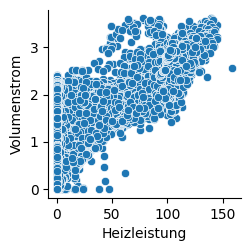

In [122]:
sns.pairplot(chp1, x_vars='Heizleistung', y_vars='Volumenstrom')

## adding volumenstrom as another regressor

In [123]:
results3 = smf.ols('Heizleistung ~ T_plus + Volumenstrom', data = startup).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heizleistung   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 5.388e+04
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:00:36   Log-Likelihood:                -65166.
No. Observations:               17868   AIC:                         1.303e+05
Df Residuals:                   17865   BIC:                         1.304e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2000      0.297      4.039      0.000       0.618       1.782
T_plus          -0.0025      0.000    -11.076      0.000      -0.003      -0.002
Volumenstrom    41.5431      0.129    321.539      0.000      41.290      41.796
==============================================================================
Omnibus:                    10829.025   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           211495.627
Skew:                          -2.556   Prob(JB):                         0.00
Kurtosis:                      19.060   Cond. No.                     1.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
y3 = results3.predict()

In [125]:
y = results.predict()
y2 = results2.predict()

In [126]:
y3.shape

(17868,)

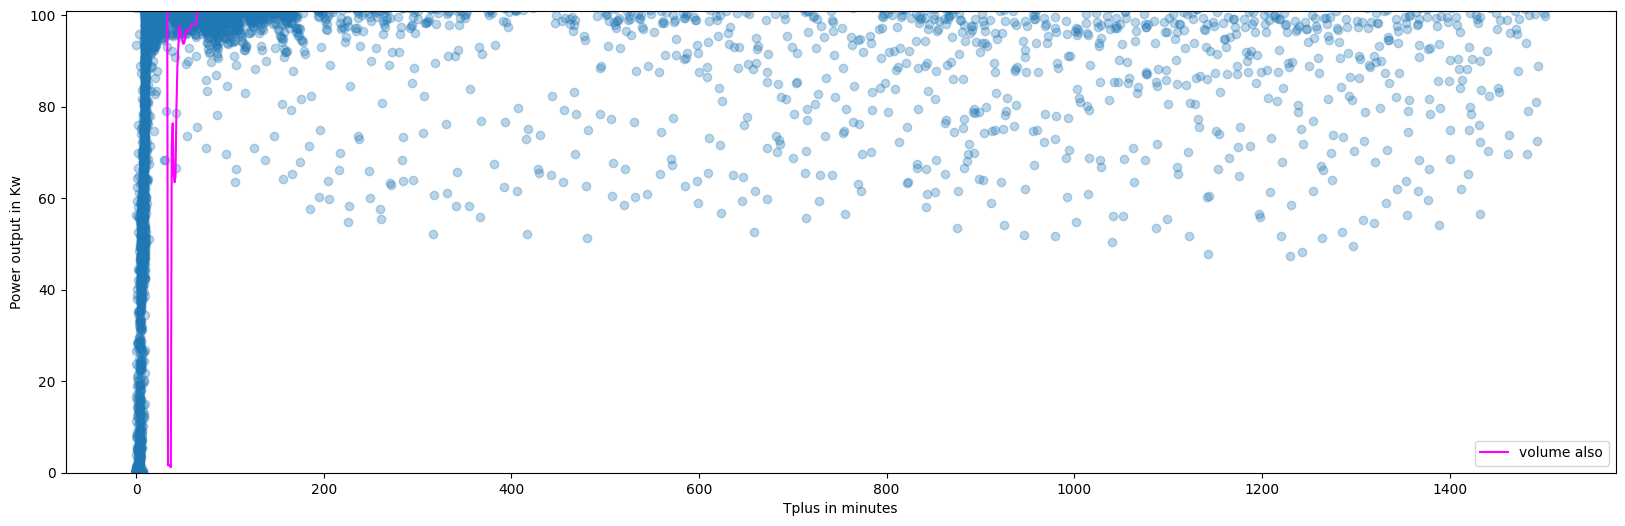

In [127]:
plt.figure(figsize=[20,6])
plt.plot(startup['T_plus'], startup['Heizleistung'], 'o', alpha = 0.3)
plt.xlabel('Tplus in minutes')
plt.ylabel('Power output in Kw')
# plt.plot(y[:100], label = '2 dof')
# plt.plot(y2[:100], label = '3 dof')
plt.plot(y3[:100], label = 'volume also', color = 'magenta' )
plt.ylim(0,101)
plt.legend()

plt.show()

In [128]:
fig = go.Figure()

# Add a line plot
# fig.add_trace(go.Scatter(
#     x=chp1.index, 
#     y=chp1['Heizleistung'], 
#     mode='lines',  # Use 'lines+markers' for both lines and markers
#     name='Sine Wave',
#     line=dict(color='royalblue', width=2)
# ))

fig.add_trace(go.Scatter(
    x=startup['T_plus'], 
    y=y, 
    mode='lines',  # Use 'lines+markers' for both lines and markers
    name='2 dof',
    line=dict(color='orange', width=2)
))

fig.add_trace(go.Scatter(
    x=startup['T_plus'], 
    y=y2, 
    mode='lines',  # Use 'lines+markers' for both lines and markers
    name='3 dof',
    line=dict(color='firebrick', width=2)
))

fig.add_trace(go.Scatter(
    x=startup['T_plus'], 
    y=y3, 
    mode='lines',  # Use 'lines+markers' for both lines and markers
    name='volume also',
    line=dict(color='pink', width=2)
))

# Customize layout
fig.update_layout(
    title='Interactive Line Plot',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    template='plotly_dark',  # Change to 'plotly_white', 'ggplot2', etc. for different styles
    hovermode='x unified',  # Display hover labels for all traces at the same x-coordinate
)

# Show the plot
fig.show()

## Two models
the idea is two have two models, one for the startup and the other for ideal.
this i feel is a better idea.

#### improper method to use the startup df

In [129]:
idle = startup.loc[startup['T_plus']>11]
results4 = smf.ols('Heizleistung ~ Volumenstrom', data = chp1).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heizleistung   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                 5.808e+05
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:00:37   Log-Likelihood:            -2.9316e+05
No. Observations:               71636   AIC:                         5.863e+05
Df Residuals:                   71634   BIC:                         5.863e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.5448      0.066    -53.534      0.000      -3.675      -3.415
Volumenstrom    39.8249      0.052    762.087      0.000      39.723      39.927
==============================================================================
Omnibus:                    43364.759   Durbin-Watson:                   0.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           410391.409
Skew:                          -2.857   Prob(JB):                         0.00
Kurtosis:                      13.239   Cond. No.                         2.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
y4 = results4.predict()

In [131]:

fig = go.Figure()

#Add a line plot
fig.add_trace(go.Scatter(
    x=idle.index, 
    y=idle['Heizleistung'], 
    mode='lines',  # Use 'lines+markers' for both lines and markers
    name='og data',
    line=dict(color='royalblue', width=2)
))

fig.add_trace(go.Scatter(
    x=idle.index, 
    y=y4,
    mode='lines',  # Use 'lines+markers' for both lines and markers
    name='idle',
    line=dict(color='orange', width=2)
))


# Customize layout
fig.update_layout(
    title='Interactive Line Plot',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    template='plotly_dark',  # Change to 'plotly_white', 'ggplot2', etc. for different styles
    hovermode='x unified',  # Display hover labels for all traces at the same x-coordinate
)

# Show the plot
fig.show()

In [132]:
y44 = results4.predict(chp1.loc['2024-11-05':'2024-11-08 09:00:00'])

C:\Users\Aqib\AppData\Local\Temp\ipykernel_16452\613326361.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [133]:

fig = go.Figure()

#Add a line plot
fig.add_trace(go.Scatter(
    x=chp1.loc['2024-11-05':'2024-11-08 09:00:00'].index, 
    y=chp1.loc['2024-11-05':'2024-11-08 09:00:00','Heizleistung'], 
    mode='lines',  # Use 'lines+markers' for both lines and markers
    name='og data',
    line=dict(color='royalblue', width=2)
))
 
fig.add_trace(go.Scatter(
    x=chp1.loc['2024-11-05':'2024-11-08 09:00:00'].index, 
    y=y44,
    mode='lines',  # Use 'lines+markers' for both lines and markers
    name='idle',
    line=dict(color='orange', width=2)
))


# Customize layout
fig.update_layout(
    title='Interactive Line Plot',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    template='plotly_dark',  # Change to 'plotly_white', 'ggplot2', etc. for different styles
    hovermode='x unified',  # Display hover labels for all traces at the same x-coordinate
)

# Show the plot
fig.show()

C:\Users\Aqib\AppData\Local\Temp\ipykernel_16452\3826911556.py:5: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\Aqib\AppData\Local\Temp\ipykernel_16452\3826911556.py:6: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\Aqib\AppData\Local\Temp\ipykernel_16452\3826911556.py:13: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



## Electrcity

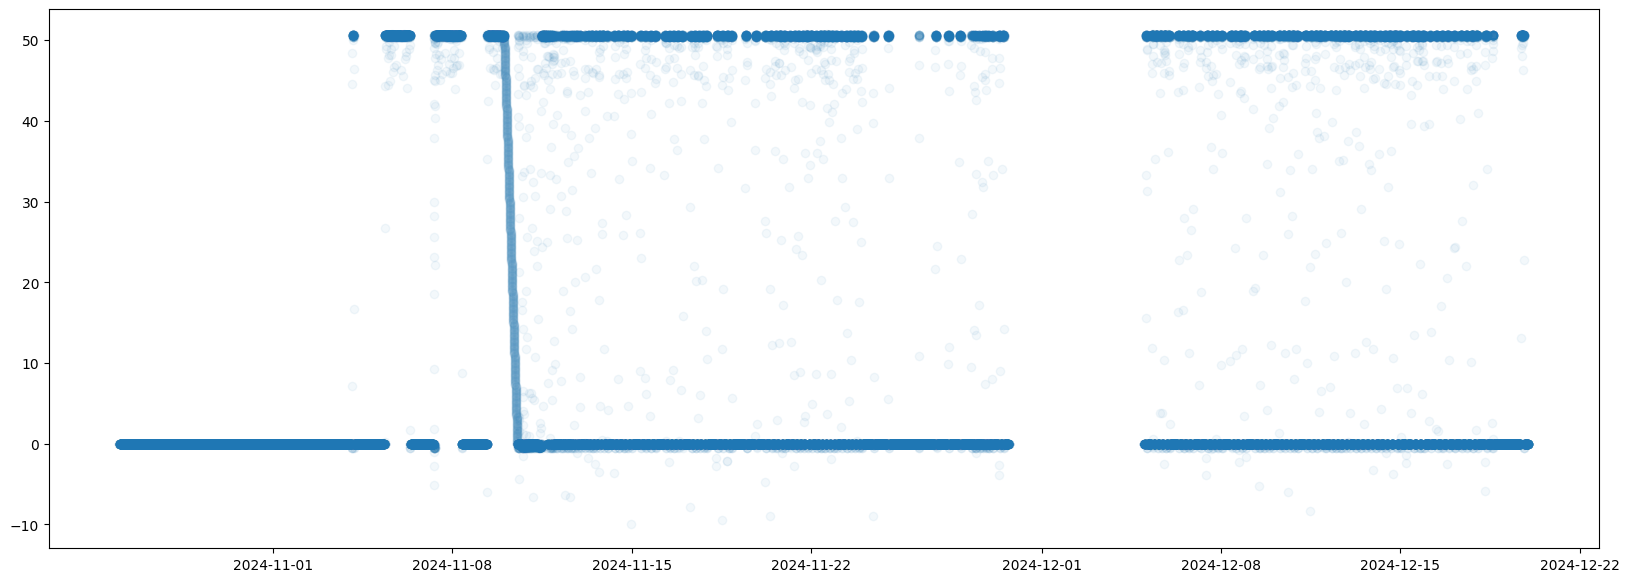

In [134]:
plt.figure(figsize=[20,7])
plt.plot(chp1['Stromzähler Leistung'], 'o', alpha = 0.05)

so more or less consistent. Within 2 minutes at peak electricity o/p